In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_AN_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2,4.0,4.0,3.0,2.0,7,8,2,9,11,7,7,1,8,5,6,NaN
1,4,NaN,NaN,NaN,NaN,5,9,6,4,8,7,9,2,9,7,10,NaN
2,7,NaN,NaN,NaN,NaN,8,8,5,10,11,2,8,2,5,5,10,NaN
3,4,NaN,NaN,NaN,NaN,7,7,13,1,7,6,8,3,8,0,8,NaN
4,6,NaN,NaN,NaN,NaN,7,6,3,7,10,7,9,3,8,3,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5,10.0,5.0,8.0,3.0,4,10,7,8,12,10,9,2,9,2,6,NaN
19996,4,NaN,NaN,NaN,NaN,7,8,2,10,12,6,8,1,9,6,8,NaN
19997,4,8.0,4.0,6.0,4.0,7,8,7,4,10,7,6,3,9,3,7,NaN
19998,4,NaN,NaN,NaN,NaN,0,2,4,6,1,0,7,0,8,0,8,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	4000
float64		column 3	4000
float64		column 4	4000
float64		column 5	4000
int64		column 6	0
int64		column 7	0
int64		column 8	0
int64		column 9	0
int64		column 10	0
int64		column 11	0
int64		column 12	0
int64		column 13	0
int64		column 14	0
int64		column 15	0
int64		column 16	0
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,20000.000000,16000.000000,16000.000000,16000.000000,16000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,0.0
mean,4.023550,7.012375,5.134188,5.364187,3.521000,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120,NaN
std,1.913212,3.253864,1.959508,2.225503,2.149906,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000,NaN


<AxesSubplot:>

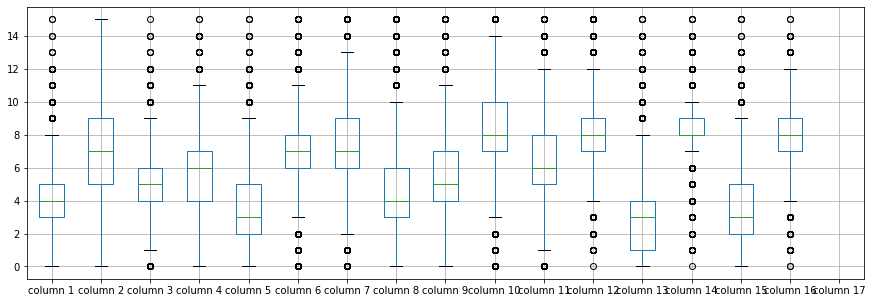

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.023550
column 2     7.012375
column 3     5.134188
column 4     5.364187
column 5     3.521000
column 6     6.897600
column 7     7.500450
column 8     4.628600
column 9     5.178650
column 10    8.282050
column 11    6.454000
column 12    7.929000
column 13    3.046100
column 14    8.338850
column 15    3.691750
column 16    7.801200
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.753488,0.848209,0.670768,0.614268,-0.032595,0.045545,0.014306,0.052086,0.148056,0.035464,-0.046333,0.489155,0.098180,0.273504,-0.105147,NaN
column 2,0.753488,1.000000,0.667346,0.820980,0.550815,0.044064,-0.048991,-0.027842,0.081512,0.159925,-0.072347,-0.028551,0.258380,-0.016663,0.211648,-0.052370,NaN
column 3,0.848209,0.667346,1.000000,0.657677,0.758212,0.059260,0.007480,-0.110697,0.050974,0.111314,-0.009950,-0.067254,0.539249,0.021893,0.231130,-0.131422,NaN
column 4,0.670768,0.820980,0.657677,1.000000,0.640531,0.048334,-0.029502,0.084617,0.039561,0.012145,-0.027511,0.006552,0.254433,0.009235,0.276361,-0.025036,NaN
column 5,0.614268,0.550815,0.758212,0.640531,1.000000,0.135423,-0.058525,-0.018096,-0.075694,-0.083674,-0.106153,-0.053635,0.616071,-0.012052,0.475246,-0.077355,NaN
column 6,-0.032595,0.044064,0.059260,0.048334,0.135423,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.341957,-0.032115,0.144325,-0.253339,0.127056,0.248816,NaN
column 7,0.045545,-0.048991,0.007480,-0.029502,-0.058525,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.600397,-0.271649,-0.036722,0.555060,-0.078008,-0.207900,NaN
column 8,0.014306,-0.027842,-0.110697,0.084617,-0.018096,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.042545,0.082020,0.142132,-0.084820,0.006546,0.182902,NaN
column 9,0.052086,0.081512,0.050974,0.039561,-0.075694,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.060116,0.119048,-0.384018,-0.052545,0.277540,-0.061335,NaN
column 10,0.148056,0.159925,0.111314,0.012145,-0.083674,0.085963,0.178318,-0.317780,0.132000,1.000000,0.057988,-0.106759,-0.175676,0.029419,-0.087019,-0.114223,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+28,17+28+28,17+28+28+28,17+28+28,17+28,17], vae_layer = False, seed = 280)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 67.72575707702637
Epoch: 1 , loss: 48.07089555358887
Epoch: 2 , loss: 44.222355233764645
Epoch: 3 , loss: 42.504175939941405
Epoch: 4 , loss: 41.55857990264892
Epoch: 5 , loss: 40.919400514221195
Epoch: 6 , loss: 40.38181026763916
Epoch: 7 , loss: 40.409215170288086
Epoch: 8 , loss: 40.00893769836426
Epoch: 9 , loss: 39.92735547790527
Training complete. Saving file...
Model saved in file: tmp/MIDAS


In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     3.000000
column 4     5.000000
column 5     1.000000
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    1.000000
column 12    6.000000
column 13    0.000000
column 14    8.000000
column 15    0.000000
column 16    8.000000
column 17   -0.527175
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN
1,0,-2.801838,-1.529457,-1.480039,-2.767986,0,0,0,0,0,0,0,0,0,0,0,NaN
2,0,-3.452533,-2.878314,-1.697693,-0.433181,0,0,0,0,0,0,0,0,0,0,0,NaN
3,0,-4.005423,-1.351871,-3.114752,-1.514591,0,0,0,0,0,0,0,0,0,0,0,NaN
4,0,-0.349526,-3.283308,0.056828,-0.629391,0,0,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN
19996,0,2.416970,0.905542,2.249300,1.733222,0,0,0,0,0,0,0,0,0,0,0,NaN
19997,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN
19998,0,-2.738899,2.343102,-1.510151,1.202473,0,0,0,0,0,0,0,0,0,0,0,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

369.7899883081994

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.09903807458238215

In [19]:
new_df.iloc[66,:]

column 1      6.000000
column 2      6.784690
column 3      4.966029
column 4      5.181120
column 5      3.360203
column 6     10.000000
column 7      5.000000
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17    -0.073273
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2,4.000000,4.000000,3.000000,2.000000,7,8,2,9,11,7,7,1,8,5,6,0.353835
1,4,4.198162,3.470543,3.519961,2.232014,5,9,6,4,8,7,9,2,9,7,10,0.229297
2,7,6.547467,5.121686,5.302307,3.566819,8,8,5,10,11,2,8,2,5,5,10,-0.909231
3,4,4.994577,3.648129,3.885248,2.485409,7,7,13,1,7,6,8,3,8,0,8,0.371536
4,6,6.650474,4.716692,5.056828,3.370609,7,6,3,7,10,7,9,3,8,3,7,0.082035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5,10.000000,5.000000,8.000000,3.000000,4,10,7,8,12,10,9,2,9,2,6,-0.198958
19996,4,9.416970,6.905542,7.249300,4.733222,7,8,2,10,12,6,8,1,9,6,8,-0.893342
19997,4,8.000000,4.000000,6.000000,4.000000,7,8,7,4,10,7,6,3,9,3,7,-0.905405
19998,4,8.261101,6.343102,6.489849,4.202473,0,2,4,6,1,0,7,0,8,0,8,-1.289649


In [21]:
imputations[-1].to_excel("Letter_AL_5(imp).xlsx", index=False, header=False)